# Making Maps with Python
## Gina Schmalzle

In this workshop we will learn how to make:
1. Scatter Plots -- we will also learn how to change the attributes of the scatterplot.
2. Histograms -- we will play around with how these look too.
3. Maps!  We will also learn how to put data on maps too.

The Python modules we will use are:
1. pandas (dateframes)
2. matplotlib (static plotting)

# The Data 
We will be plotting earthquake locations, depths and magnitudes from 1906 to 2016 that occurred in the Pacific Northwest that have magnitudes greater than M2.5, retrieved from the USGS earthquake catalog (http://earthquake.usgs.gov/earthquakes/search/).  

# Retrieving the data 

Let's Read in the data.  These 'data' are actually weather forecasts (modeled) for individual weather stations across the United States. The file that will be read contains the forecast for one day (April 22, 2014) for 0 to 7 days out, where the 0th day is the forecast on April 22nd.    

In [23]:
# Import Pandas and pull csv data into dataframe
import pandas as pd
filename='query.csv'

# Need to read in times
dateparse = lambda x: pd.datetime.strptime(x[:-1], '%Y-%m-%dT%H:%M:%S.%f')

# Read in dataframe
eq_df = pd.read_csv(filename, parse_dates=['time'], date_parser=dateparse)

In [24]:
eq_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-02-08 16:50:07.960,46.116833,-122.162667,7.080,2.85,ml,27,90,0.019670,0.15,...,2016-02-09T02:02:25.160Z,"31km NE of Amboy, Washington",earthquake,0.31,0.28,0.147,119,reviewed,uw,uw
1,2016-02-08 02:12:35.220,40.785333,-123.493333,21.270,2.99,ml,63,28,0.202300,0.14,...,2016-02-09T03:43:04.626Z,"20km SE of Willow Creek, California",earthquake,0.19,0.36,0.201,23,reviewed,nc,nc
2,2016-02-06 06:49:55.070,40.330167,-124.630667,22.970,2.71,md,29,243,0.264900,0.14,...,2016-02-08T23:05:06.550Z,"41km SW of Ferndale, California",earthquake,0.51,0.77,0.088,19,reviewed,nc,nc
3,2016-02-05 22:13:02.370,47.276167,-122.291500,24.763,2.57,ml,32,40,0.055330,0.30,...,2016-02-06T04:03:32.800Z,"0km WSW of Lakeland South, Washington",earthquake,0.52,0.76,0.122,96,reviewed,uw,uw
4,2016-02-02 14:28:34.810,40.720667,-121.523833,5.900,3.08,ml,24,101,0.106600,0.09,...,2016-02-02T23:54:06.408Z,"21km SSE of Burney, California",earthquake,0.30,1.23,0.163,21,reviewed,nc,nc
5,2016-02-02 14:23:34.940,40.719667,-121.522667,6.070,3.43,ml,25,101,0.107100,0.09,...,2016-02-02T21:10:09.040Z,"21km SSE of Burney, California",earthquake,0.28,1.15,0.088,6,reviewed,nc,nc
6,2016-02-01 12:38:20.610,40.411833,-125.300333,10.770,2.74,md,24,270,0.737600,0.28,...,2016-02-02T07:12:04.370Z,"89km WSW of Ferndale, California",earthquake,6.56,7.67,0.152,31,reviewed,nc,nc
7,2016-01-30 00:30:52.050,41.005000,-127.444700,10.000,4.90,mb,NaN,106,2.590000,1.17,...,2016-02-02T19:16:03.000Z,"272km W of Ferndale, California",earthquake,7.60,1.90,0.056,102,reviewed,us,us
8,2016-01-30 00:28:41.490,40.896600,-127.272200,10.000,5.00,mb,NaN,104,2.444000,1.42,...,2016-02-02T19:11:05.000Z,"256km W of Ferndale, California",earthquake,8.20,1.90,0.063,81,reviewed,us,us
9,2016-01-29 14:06:40.490,40.767167,-127.238167,9.620,3.36,ml,12,312,2.227000,0.18,...,2016-02-03T06:49:04.709Z,"252km W of Ferndale, California",earthquake,1.96,31.61,0.116,12,reviewed,nc,nc


In [30]:
eq_df['time']

0       2016-02-08 16:50:07.960
1       2016-02-08 02:12:35.220
2       2016-02-06 06:49:55.070
3       2016-02-05 22:13:02.370
4       2016-02-02 14:28:34.810
5       2016-02-02 14:23:34.940
6       2016-02-01 12:38:20.610
7       2016-01-30 00:30:52.050
8       2016-01-30 00:28:41.490
9       2016-01-29 14:06:40.490
10      2016-01-29 10:21:31.380
11      2016-01-29 09:35:11.910
12      2016-01-28 09:22:13.590
13      2016-01-27 21:43:21.050
14      2016-01-25 17:11:10.720
15      2016-01-23 18:05:40.500
16      2016-01-23 17:28:11.460
17      2016-01-22 23:12:16.370
18      2016-01-19 19:54:42.190
19      2016-01-18 13:48:38.880
20      2016-01-18 13:48:29.720
21      2016-01-18 00:21:21.760
22      2016-01-17 19:53:17.990
23      2016-01-15 13:05:24.680
24      2016-01-12 04:24:20.040
25      2016-01-12 03:16:07.230
26      2016-01-11 10:33:38.930
27      2016-01-10 14:06:12.980
28      2016-01-10 13:05:10.140
29      2016-01-08 16:43:54.510
                  ...          
12155   

# Plotting using Matplotlib

In [26]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

## Setting figure parameters
You can set figure parameters using rcParams. A list of parameters you can change are shown using the .keys() method:

In [ ]:
mpl.rcParams.keys()

And you can see the value using the keys.  For example, if you want the resolution of your figure you would type:

In [34]:
mpl.rcParams[u'figure.dpi']

80.0

So let's ensure that our plots have good resolution and are fairly sizeable:

In [35]:
mpl.rcParams[u'figure.figsize'] = [12, 8]
mpl.rcParams[u'figure.dpi'] = 300

## Scatter Plots
The scatter method takes in x and y values in list or array format.  Maybe you want to see earthquake magnitude over time.  You will need to convet the datetime format to date()

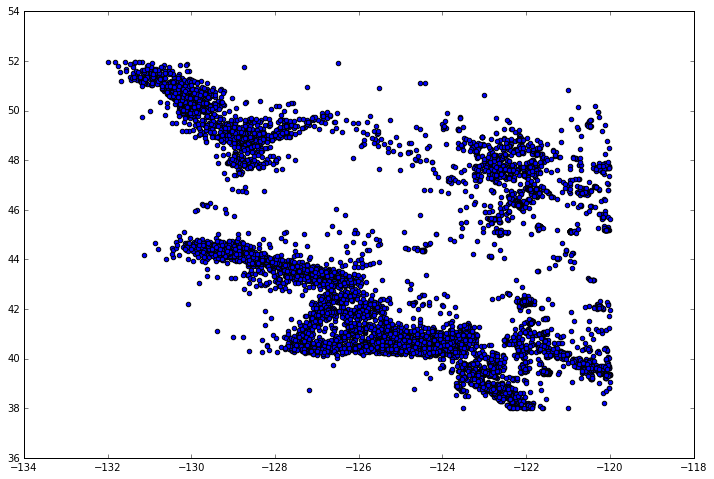

In [43]:
plt.scatter([dt.date() for dt in eq_df['time']], eq_df['mag'])

In [ ]:
plt.scatter(eq_df['longitude'], eq_df['latitude'])

Well, that's interesting.  Prior to ~1970, the only earthquakes recorded were > M5.  Far less were also recorded.  This is likely due to the quantity of instruments running -- the fewer the seismometers, the fewer earthquakes can be detected. Also, smaller earthquakes cannot be detected as easily.  Adding to the greater number of earthquakes seen in this graph in recent times, is the fact that the instrumentation has also gotten more sensitive to small movements. 

Now let's jazz is up a bit -- 
Let's Make the lines red and dashed and change the size of the circles, change them to stars and make them green

In [37]:
plt.plot(day_list, maxt_list, '.r--')
plt.scatter(day_list, maxt_list, s = 400, color='green', marker='*')
plt.show()

NameError: name 'day_list' is not defined

Labels, labels, labels!  How is one to know what you just plotted?  Let's add the axes labels and the title

In [ ]:
plt.plot(day_list, maxt_list, '.r--')
plt.scatter(day_list, maxt_list, s = 400, color='green', marker='*')
plt.ylabel ('Forecasted Max Temperature, Deg F')
plt.xlabel ('Days from Target day April 22, 2014')
plt.title ('Forecasted Max Temperature')
plt.show()

More marker fun can be found [here](http://matplotlib.org/api/markers_api.html).  More line fun can be found [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

Getting the idea?

Let's do another plot.  Let's look at all of the Max Temperature forecasts 2 days out, and plot them with respect to Latitude.  We will need to pick out from forecast_dict all the Max T values for all of the weather stations made 2 days before April 22, 2014.  First, we will need to get all the Latitudes and Longitudes for each site, then we will need to pick out all the Max T values for each of the stations for that day.  

We will keep in mind that maybe in the future you might want to look at Min T, or a different day.

In [ ]:
# Get keys of forecast_dict (lats and longs):
keys = forecast_dict.keys()
# Circle through all the keys to get the values for the 2nd day maximum temperature and the
# corresponding Lat and Longs
day_out = '2'       # 0-7
temp = 'MaxT'  # MaxT or MinT
temperature = []; lat = []; lon = []
for key in keys:
    temperature.append(float(forecast_dict[key][day_out][temp]))
    lat.append(float(key[0]))
    lon.append(float(key[1]))
# Now that those are collected, let's see what the Temperature as a function of Latitude is:
plt.scatter(temperature,lat)


# Coloring Points in a Scatter Plot
Let's try again, but this time, color according to Longitude.  Again, let's keep in mind we may want to color by something else.  You can try playing with these later.

In [ ]:
color_by = lon
label = 'Long'  # Need to rename if 'color_by' is changed
max_color_by = max(color_by)
min_color_by = min(color_by)

fig, ax = plt.subplots()
s = ax.scatter(temperature, lat,   
               c=color_by, 
               s=200, 
               marker='o',                   # Plot circles
              # alpha = 0.2,
               cmap = plt.cm.coolwarm,       # Color pallete
               vmin = min_color_by,          # Min value  
               vmax = max_color_by)          # Max value

cbar = plt.colorbar(mappable = s, ax = ax)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(label)
plt.xlabel('{0} in Deg F, forecasted {1} days out'.format(temp,day_out))
plt.ylabel('Latitude, Deg N')
plt.title('{0} forecasted {1} Days out from target day April 22, 2014'.format(temp,day_out))
plt.show()

Color map stuff can be found here: http://matplotlib.org/users/colormaps.html

# Histograms!
Let's take a step back and work on a histogram.
What we are going to plot is the distribution of forecasted temperatures.
Let's start with a very simple histogram of the temperature we left off with -- 

In [ ]:
plt.hist(temperature)
plt.ylabel ('Counts')
plt.xlabel(temp)
plt.show()

Now let's try again and jazz it up..
Let's increase the number of bins (bin size calculated by the difference Min and Max values, divided by the number of bins). Let's also change the color of the bars and make them a little translucent.

In [ ]:
plt.hist(temperature, 100, color='green', alpha=0.2)
plt.ylabel ('Counts')
plt.xlabel(temp)
plt.title('Histogram of {0}'.format(temp))
plt.show()

Python histograms give you some information about them.  Let's explore.

In [ ]:
n, bins, patches = plt.hist(temperature, 10, color='green', alpha=0.2)

In [ ]:
# n are the number of counts
n

In [ ]:
# bins are the x-centered location of the bins
bins

In [ ]:
# And patches are a list of the matplotlib rectangle shapes that make 
# the bins.
patches

In [ ]:
patches[0]

# Mapping
Now that we have the basics down, let's start with the mapping!
We will be using Matplotlib's basemap:  http://matplotlib.org/basemap/.  Basemap was imported in the second cell of this notebook.

Let's make a simple Mercator Projection Map.  The code in the next cell is straight from the Basemap example section -- http://matplotlib.org/basemap/users/merc.html

llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon are the lat/lon values of the lower left and upper right corners of the map.
lat_ts is the latitude of true scale.
resolution = 'c' means use crude resolution coastlines.

In [ ]:
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans 
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

Now let's change this map to do what we need.  Let's
1. Change the area to the continental United States
2. Increase the resolution to intermediate ('i')
3. Remove the horrific ocean/land colors provided above

In [ ]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='i')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,5.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("Forecast {0} days out".format(day_out))
plt.show()

Now let's try adding our data!  Let's just plot their locations first...

In [ ]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='i')
m.drawcoastlines()
m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,5.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("Forecast {0} days out".format(day_out))
x,y = m(lon, lat)
m.plot(x,y, 'bo', markersize=5)
plt.show()

Now let's color the stations by their forecasted temperature (Max T) and add a colorbar


In [ ]:
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,lat_ts=20,resolution='i')
m.drawcoastlines()
m.drawcountries()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,5.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[True,False,False,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("Forecast {0} days out".format(day_out))
x,y = m(lon, lat)
jet = plt.cm.get_cmap('jet')
sc = plt.scatter(x,y, c=temperature, vmin=0, vmax =35, cmap=jet, s=20, edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label(temp)
plt.show()

Well, that concludes what we are going over today.  Here are a few exercises you can try:

1. In the first graph -- include the weather forecast through time for multiple stations.  Color each set of lines differently for each weather station.  Also color the points differently for each
 
2. In the second graph -- Try creating a figure with subplots and show the forecasted Max Temperature and forecasted Mon Temperature as a function of Latitude side by side.

3. In the histogram -- Try overlaying a histogram with of the distribution of Max T values for day 2 with the distribution of Min T values for the same day.

4. For the map -- Create a figure with multiple maps, where each map shows the forecasted distribution of temperature for each day out.  Change the resolution.  Change the location of labels.

5. What is the difference of the temperature forecast made April 22, 2014 with the previous forecast days? Can you map the differences?  

Thanks for joining us today!  Hope you had fun :-).